# Lasso & Ridge Regression

O principal objetivo da regularização é obter um modelo que se ajusta à relação entre o x e y, e que possua coeficientes de pesos baixos.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear
import scipy.io
%matplotlib inline

### Informação Teórica Acerca dos Métodos

##### <i> Ridge </i>

Introduz um novo termo de regularização (lambda*||B||_2^2,) que contem a norma l2 ao quadrado. Este termo é uma constrain que irá penalizar o uso de coeficientes de pesos elevados. Nesta regularização os coeficientes tendem em diminuir mais lentamente logo um lambda mais elevado pode ajudar a visualizar o resultado.

B_ridge = arg min (||y-XB||_2)^2 + lambda*||B||_2^2

##### <i> Lasso </i>

O termo de regularização em tudo é idêntico ao do método de Ridge contudo a norma é a norma 1. Nesta regulariazação o vetor dos coeficientes é esparso, uma vez que os coeficientes menos importantes serão nulos. Deste modo reduz a complexidade do problema permitindo que seja mais rapido e obtenha melhores estimativas nos coeficientes que realmente importam.

B_lasso = arg min (||y-XB||_2)^2 + lambda*||B||_1^2

### Importar dados X e Y

In [2]:
x_data = np.load('data3_x.npy')
y_data = np.load('data3_y.npy')

scipy.io.savemat('test_andre.mat', dict(x=x_data, y=y_data))
# Ler files .mat --> scipy.io.loadmat

In [3]:
x_data = pd.DataFrame(x_data)
y_data = pd.DataFrame(y_data)

In [4]:
x_data.head()

,0,1,2
0,-0.525793,0.589945,1.385769
1,0.587630,-0.472987,-0.184388
2,0.127617,0.725941,0.974332
3,1.488531,2.065563,0.970519
4,1.311613,-0.410078,1.433540


In [5]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     float64
 1   1       50 non-null     float64
 2   2       50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [6]:
x_data.corr()

,0,1,2
0,1.000000,-0.090791,-0.076234
1,-0.090791,1.000000,0.082278
2,-0.076234,0.082278,1.000000


### Instanciar o Modelo Ridge

Primeiro vamos definir alguns parâmetros para aplicar nos modelos:

In [7]:
alpha_vector = np.arange(0.001,10,0.1) #ou Lambda
num_iteracoes = 10000
aux = 0 # usado no ciclo de treino para vários lambdas
espaco = 0 # usado no ciclo de treino para vários lambdas

Criar matriz de coeficientes uteis para a representação:

In [8]:
Matriz_Ridge_Coef = np.ones((alpha_vector.size,3), dtype = float)
Matriz_Ridge_Classic_Coef = np.ones((alpha_vector.size,3), dtype = float)

### Treinar o Modelo Ridge para os vários Alfas (Lambdas)

In [9]:
for aux in alpha_vector:
    Ridge_Model_alpha = linear.Ridge(alpha = aux, max_iter=10000)
    Ridge_Model_alpha.fit(x_data,y_data)
    Matriz_Ridge_Coef[espaco,:] = Ridge_Model_alpha.coef_
    espaco = espaco + 1 
    #linhas -> para cada alfa
    #colunas -> coeficientes

### Instanciar o Modelo Lasso

Criar matriz de coeficientes uteis para a representação:

In [10]:
Matriz_Lasso_Coef = np.ones((alpha_vector.size,3), dtype = float)
Matriz_Lasso_Classic_Coef = np.ones((alpha_vector.size,3), dtype = float)

### Treinar o Modelo Lasso para os vários Alfas (Lambdas)

In [11]:
aux = 0
espaco = 0
for aux in alpha_vector:
    Lasso_Model_alpha = linear.Lasso(alpha = aux, max_iter=10000)
    Lasso_Model_alpha.fit(x_data,y_data)
    Matriz_Lasso_Coef[espaco,:] = Lasso_Model_alpha.coef_
    espaco = espaco + 1

### Gráficos

#### <i> Gráficos Ridge Regression </i>

Text(0, 0.5, 'Coeficientes de Ridge')

<Figure size 432x288 with 0 Axes>

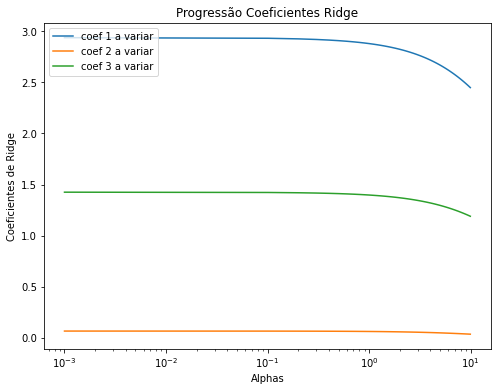

In [12]:
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(alpha_vector, Matriz_Ridge_Coef[:,0], label = 'coef 1 a variar')
plt.plot(alpha_vector, Matriz_Ridge_Coef[:,1], label = 'coef 2 a variar')
plt.plot(alpha_vector, Matriz_Ridge_Coef[:,2], label = 'coef 3 a variar')

plt.xscale('log')
plt.legend()
plt.title('Progressão Coeficientes Ridge')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes de Ridge')


Olhado para o gráfico vemos que nenhum dos coeficientes chega a 0, logo não dá para concluir a feature inutil.

#### <i> Gráficos Lasso Regression </i>

Text(0, 0.5, 'Coeficientes de Lasso')

<Figure size 432x288 with 0 Axes>

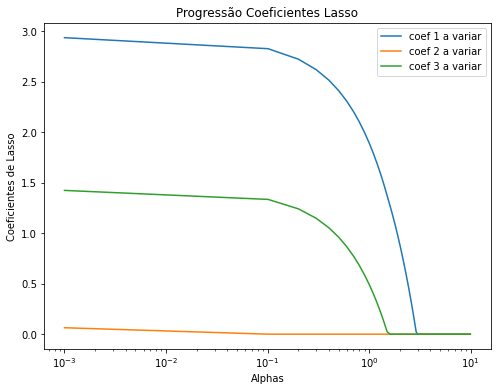

In [13]:
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(alpha_vector, Matriz_Lasso_Coef[:,0], label = 'coef 1 a variar')
plt.plot(alpha_vector, Matriz_Lasso_Coef[:,1], label = 'coef 2 a variar')
plt.plot(alpha_vector, Matriz_Lasso_Coef[:,2], label = 'coef 3 a variar')

plt.xscale('log')
plt.legend()
plt.title('Progressão Coeficientes Lasso')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes de Lasso')

Olhando para o gráfico vemos que o coeficiente 2 tende mais rapidamente para 0 que os outros coeficientes. Isto indica que a feature 2 é inutil.

### Comentário aos resultados obtidos

Ambos os modelos fazem uma estimativa levando os coeficientes a tender para 0.
O modelo Ridge, para os valores de alfa pequenos 10^-3 a 0.01, faz com que os coeficientes
demorem mais a tender para 0. Já o modelo Lasso, para o mesmo intervalo de aplhas, faz com
que os coeficientes tendam mais rapidamente para 0 levando a uma mais fácil identificação
da caracteristica inútil (a que mais rapidamente tende para 0), neste caso será a caracteristia
x2, pois o segundo coeficiente tende para 0 primeiro do que os outros.

### Treinar o modelo com o melhor alpha

Observando o gráfico do modelo Lasso vemos que a feature 2 tende chega a 0 com um lambda a volta de 0.071. Vamos então treinar o modelo lasso para esse valor. Vamos assim obter a melhor estimativa.

In [14]:
alpha_critico = 0.071

In [15]:
Lasso_Modelo = linear.Lasso(alpha = 0.071, max_iter= num_iteracoes)
Lasso_Modelo.fit(x_data,y_data)

Lasso(alpha=0.071, max_iter=10000)

### Avaliar a Função de Custo

No modelo Lasso o python fornece-nos o coeficiente de determinação ao quadrado seguindo a norma 2. Cabe nos a nós a essa secção (.score) retirar o quadrado.

In [16]:
SSE_alpha_certo = np.sqrt(Lasso_Modelo.score(x_data,y_data))

In [17]:
print(SSE_alpha_certo)

0.9855028631808352


### Fazer Predictions Com o Modelo de Regressão Lasso

In [18]:
predictions = Lasso_Modelo.predict(x_data)

Text(0, 0.5, 'Coeficientes de Lasso')

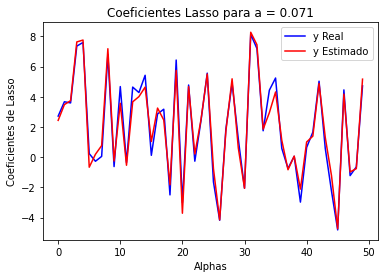

In [19]:
plt.plot(y_data,'b', label = 'y Real')
plt.plot(predictions, 'r', label = 'y Estimado')
plt.legend()
plt.title('Coeficientes Lasso para a = 0.071')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes de Lasso')